In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from time import time

In [36]:
start_time = time()

In [37]:
train_data = pd.read_excel("training_data.xlsx")
train_data.head()

,hashtags,full_text,in_reply_to_screen_name,country_user,gender_user,pol_spec_user
0,feminist AskMeAnything,b'RT @swedennewyork: What does it mean to have...,NaN,sweden,Male,Left
1,NaN,b'Jens Stoltenberg \xc3\xa5pnet virtuelle Rock...,NaN,norway,Male,Left
2,NaN,b'@Panenka_Bart Veel beterschap Bart en Loes! ...,BartDerwael,belgium,Male,Left
3,NaN,b'RT @CarlEmilLind: Tydelige S aftryk: \n\nPsk...,NaN,denmark,Female,Left
4,NaN,b'\xf0\x9f\x98\x83 https://t.co/bpqoZ8Y4wm',NaN,sweden,Male,Left


In [4]:
test_data = pd.read_excel("test_data.xlsx")
test_data.head()

,Id,hashtags,full_text,in_reply_to_screen_name,country_user,gender_user,pol_spec_user
0,0,EUAfrica,"b'RT @eu_eeas: ""Let me tell you that a big par...",NaN,belgium,Male,NaN
1,1,COVID19,"b'RT @stateofgreendk: ""Although the #COVID19 p...",NaN,denmark,Male,NaN
2,2,NaN,b'@hjorvarhaflida // jebb - i\xc3\xb0a\xc3\xb0...,hjorvarhaflida,iceland,Female,NaN
3,3,NaN,"b'I ett l\xc3\xa4ge med pandemi, klimat, trans...",NaN,sweden,Female,NaN
4,4,UNGA ChildrenNotSoldiers,b'RT @BelgiumMFA: \xf0\x9f\x93\x8d #UNGA\n\n\x...,NaN,belgium,Male,NaN


## Part I

### Section A - (a)

In [38]:
summary_table = pd.DataFrame(columns=['feature','minimum','average','median','maximum'])
summary_table

,feature,minimum,average,median,maximum


In [39]:
tweets_words_list = train_data["full_text"].str.split("\\s+")

In [40]:
tweet_length_words = pd.DataFrame({'feature':['Tweet Length - Words'],
                                   'minimum':[tweets_words_list.str.len().min()],
                                   'average':[tweets_words_list.str.len().mean()],
                                   'median':[tweets_words_list.str.len().median()],
                                   'maximum':[tweets_words_list.str.len().max()]})
summary_table = pd.concat([summary_table,tweet_length_words], ignore_index = True)

tweet_length_char = pd.DataFrame({'feature':['Tweet Length - Characters'],
                                   'minimum':[train_data["full_text"].str.len().min()],
                                   'average':[train_data["full_text"].str.len().mean()],
                                   'median':[train_data["full_text"].str.len().median()],
                                   'maximum':[train_data["full_text"].str.len().max()]})
summary_table = pd.concat([summary_table,tweet_length_char], ignore_index = True)

summary_table

/var/folders/rn/spq65hf16wz2f_02yktrncd00000gn/T/ipykernel_53825/4094067133.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  summary_table = pd.concat([summary_table,tweet_length_words], ignore_index = True)


,feature,minimum,average,median,maximum
0,Tweet Length - Words,1,20.141102,19.0,89
1,Tweet Length - Characters,4,167.304121,156.0,2994


In [41]:
hashtag_words_list = train_data["hashtags"].str.split("\\s+")

In [42]:
hashtag_length_words = pd.DataFrame({'feature':['Hashtag Length - Words'],
                                   'minimum':[hashtag_words_list.str.len().min()],
                                   'average':[hashtag_words_list.str.len().mean()],
                                   'median':[hashtag_words_list.str.len().median()],
                                   'maximum':[hashtag_words_list.str.len().max()]})
summary_table = pd.concat([summary_table,hashtag_length_words], ignore_index = True)

hashtag_length_char = pd.DataFrame({'feature':['Hashtag Length - Characters'],
                                   'minimum':[train_data["hashtags"].str.len().min()],
                                   'average':[train_data["hashtags"].str.len().mean()],
                                   'median':[train_data["hashtags"].str.len().median()],
                                   'maximum':[train_data["hashtags"].str.len().max()]})
summary_table = pd.concat([summary_table,hashtag_length_char], ignore_index = True)

summary_table

,feature,minimum,average,median,maximum
0,Tweet Length - Words,1,20.141102,19.0,89
1,Tweet Length - Characters,4,167.304121,156.0,2994
2,Hashtag Length - Words,1.0,1.577724,1.0,16.0
3,Hashtag Length - Characters,1.0,14.089948,11.0,145.0


In [48]:
train_data.head(10)

,hashtags,full_text,in_reply_to_screen_name,country_user,gender_user,pol_spec_user
0,feminist AskMeAnything,b'RT @swedennewyork: What does it mean to have...,NaN,sweden,Male,Left
1,NaN,b'Jens Stoltenberg \xc3\xa5pnet virtuelle Rock...,NaN,norway,Male,Left
2,NaN,b'@Panenka_Bart Veel beterschap Bart en Loes! ...,BartDerwael,belgium,Male,Left
3,NaN,b'RT @CarlEmilLind: Tydelige S aftryk: \n\nPsk...,NaN,denmark,Female,Left
4,NaN,b'\xf0\x9f\x98\x83 https://t.co/bpqoZ8Y4wm',NaN,sweden,Male,Left
5,NaN,b'Idag togs f\xc3\xb6rsta spadtaget i Kigali f...,NaN,sweden,Male,Left
6,NaN,"b'RT @socialdep: ""Alla ska kunna lita p\xc3\xa...",NaN,sweden,Female,Left
7,NaN,b'@listighjort Jeg har tidligere v\xc3\xa6ret ...,listighjort,denmark,Female,Left
8,NaN,"b'RT @Utbdep: Fem l\xc3\xa4ros\xc3\xa4ten, @um...",NaN,sweden,Female,Left
9,Cyprus,b'RT @cyprusmail: \xe2\x80\x98No timeframes\xe...,NaN,norway,Male,Left


### Section A - (b)

In [45]:
countries = list(train_data['country_user'].unique())

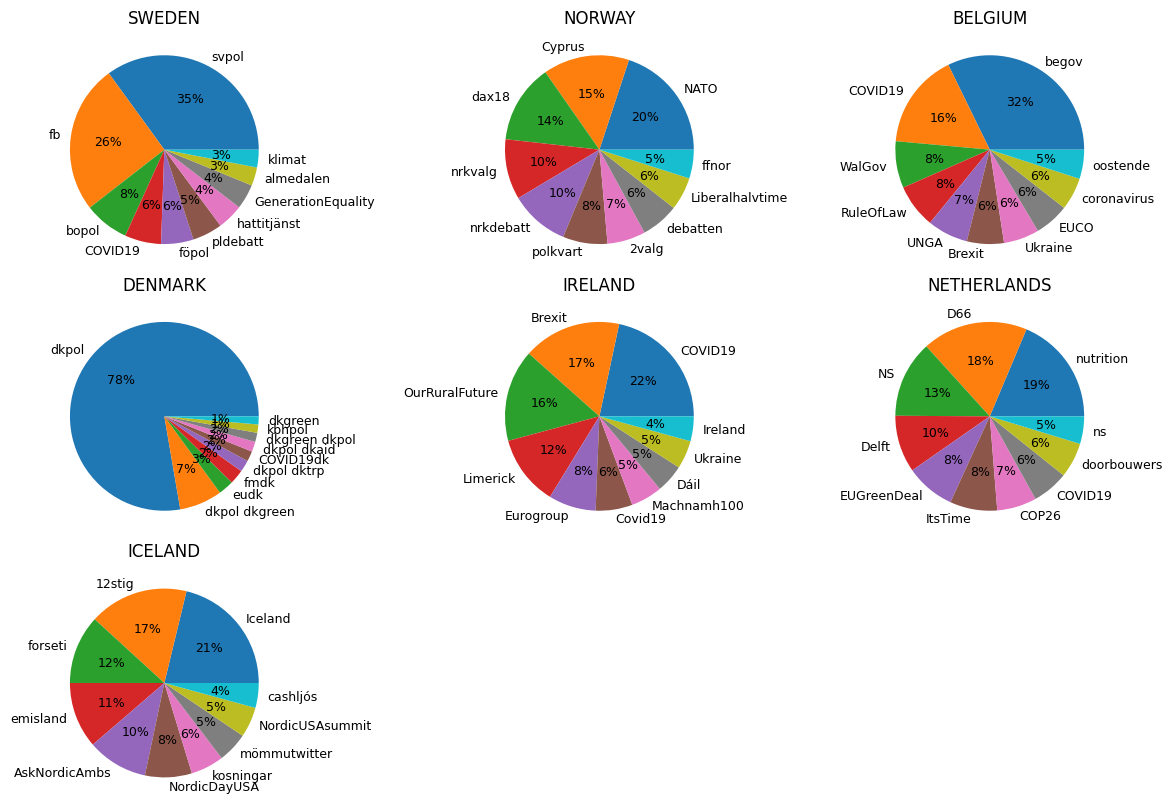

In [47]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8), constrained_layout=True)

for country,ax in zip(countries,axes.flat):
    ax.pie(train_data[train_data['country_user']==country]['hashtags'].value_counts().nlargest(10),
           labels=train_data[train_data['country_user']==country]['hashtags'].value_counts().nlargest(10).index,
           autopct='%.0f%%',
           labeldistance=1.1,
           textprops={'fontsize':9})
    ax.set_title(country.upper())
fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])
plt.show()
    

### Section A - (c)

(0.0, 100.0)

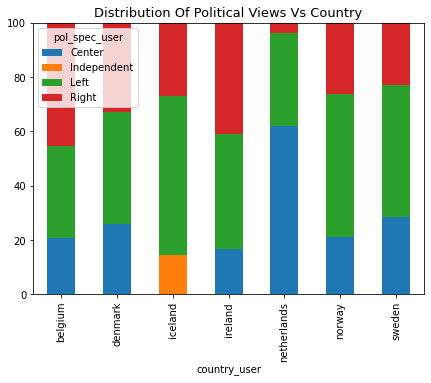

In [ ]:
# Table to add percentage distribution of political views for each country
data=train_data[['country_user','pol_spec_user']].groupby(['country_user','pol_spec_user']).value_counts().reset_index()
data.columns=['country_user','pol_spec_user','count']
data['perc']=(data['count']*100) / data.groupby('country_user')['count'].transform('sum')
data.head(3)

# Pivot Table to convert it into a matrix so that stacked bar chart can be created
pivot = pd.pivot_table(data=data, index=['country_user'], columns=['pol_spec_user'], values='perc')
pivot

# Creating stacked bar chart
ax = pivot.plot.bar(stacked=True, figsize=(7,5))
ax.set_title('Distribution Of Political Views Vs Country', fontsize=13)
ax.set_ylim(0,100)

### Section A - (d)

(0.0, 100.0)

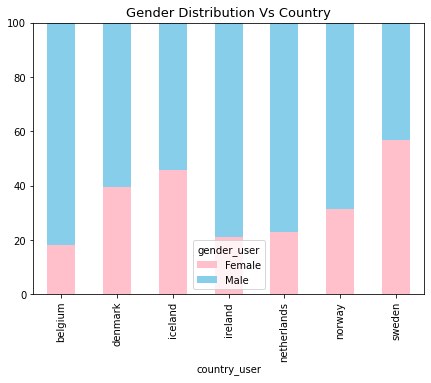

In [ ]:
# Table to add percentage distribution of political views for each country
data=train_data[['country_user','gender_user']].groupby(['country_user','gender_user']).value_counts().reset_index()
data.columns=['country_user','gender_user','count']
data['perc']=(data['count']*100) / data.groupby('country_user')['count'].transform('sum')
data.head(3)

# Pivot Table to convert it into a matrix so that stacked bar chart can be created
pivot = pd.pivot_table(data=data, index=['country_user'], columns=['gender_user'], values='perc')
pivot

# Creating stacked bar chart
ax = pivot.plot.bar(stacked=True,color=['pink', 'skyblue'],figsize=(7,5))
ax.set_title('Gender Distribution Vs Country', fontsize=13)
ax.set_ylim(0,100)

### Section B - (a)

In [14]:
import lemmatizer
cleaned_tweets = train_data['full_text'].apply(lemmatizer.lemmatize_tweet)

In [15]:
train_data['text_clean'] = cleaned_tweets

In [16]:
cleaned_tweets_words_list = train_data["text_clean"].str.split("\\s+")

cleaned_tweet_length_words = pd.DataFrame({'feature':['Cleaned Tweet Length - Words'],
                                   'minimum':[cleaned_tweets_words_list.str.len().min()],
                                   'average':[cleaned_tweets_words_list.str.len().mean()],
                                   'median':[cleaned_tweets_words_list.str.len().median()],
                                   'maximum':[cleaned_tweets_words_list.str.len().max()]})
summary_table = pd.concat([summary_table,cleaned_tweet_length_words], ignore_index = True)

cleaned_tweet_length_char = pd.DataFrame({'feature':['Cleaned Tweet Length - Characters'],
                                   'minimum':[train_data["text_clean"].str.len().min()],
                                   'average':[train_data["text_clean"].str.len().mean()],
                                   'median':[train_data["text_clean"].str.len().median()],
                                   'maximum':[train_data["text_clean"].str.len().max()]})
summary_table = pd.concat([summary_table,cleaned_tweet_length_char], ignore_index = True)

summary_table

,feature,minimum,average,median,maximum
0,Tweet Length - Words,1,20.141102,19.0,89
1,Tweet Length - Characters,4,167.304121,156.0,2994
2,Hashtag Length - Words,1.0,1.577724,1.0,16.0
3,Hashtag Length - Characters,1.0,14.089948,11.0,145.0
4,Cleaned Tweet Length - Words,1,13.032930,13.0,77
5,Cleaned Tweet Length - Characters,0,117.312910,113.0,2227


### Section B - (b)

In [17]:
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from time import time

In [ ]:
n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20
batch_size = 128
init = "nndsvda"


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [ ]:
# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
# tfidf_vectorizer = TfidfVectorizer(
#     max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
# )

tfidf_vectorizer = TfidfVectorizer(max_features=200000)

t0 = time()
tfidf = tfidf_vectorizer.fit_transform(train_data['text_clean'])
print("done in %0.3fs." % (time() - t0))

Extracting tf-idf features for NMF...
done in 3.242s.


In [ ]:
# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
# tf_vectorizer = CountVectorizer(
#     max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
# )

tf_vectorizer = CountVectorizer(max_features=200000)
t0 = time()
tf = tf_vectorizer.fit_transform(train_data['text_clean'])
print("done in %0.3fs." % (time() - t0))
print()

Extracting tf features for LDA...
done in 3.289s.





 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 23.622s.


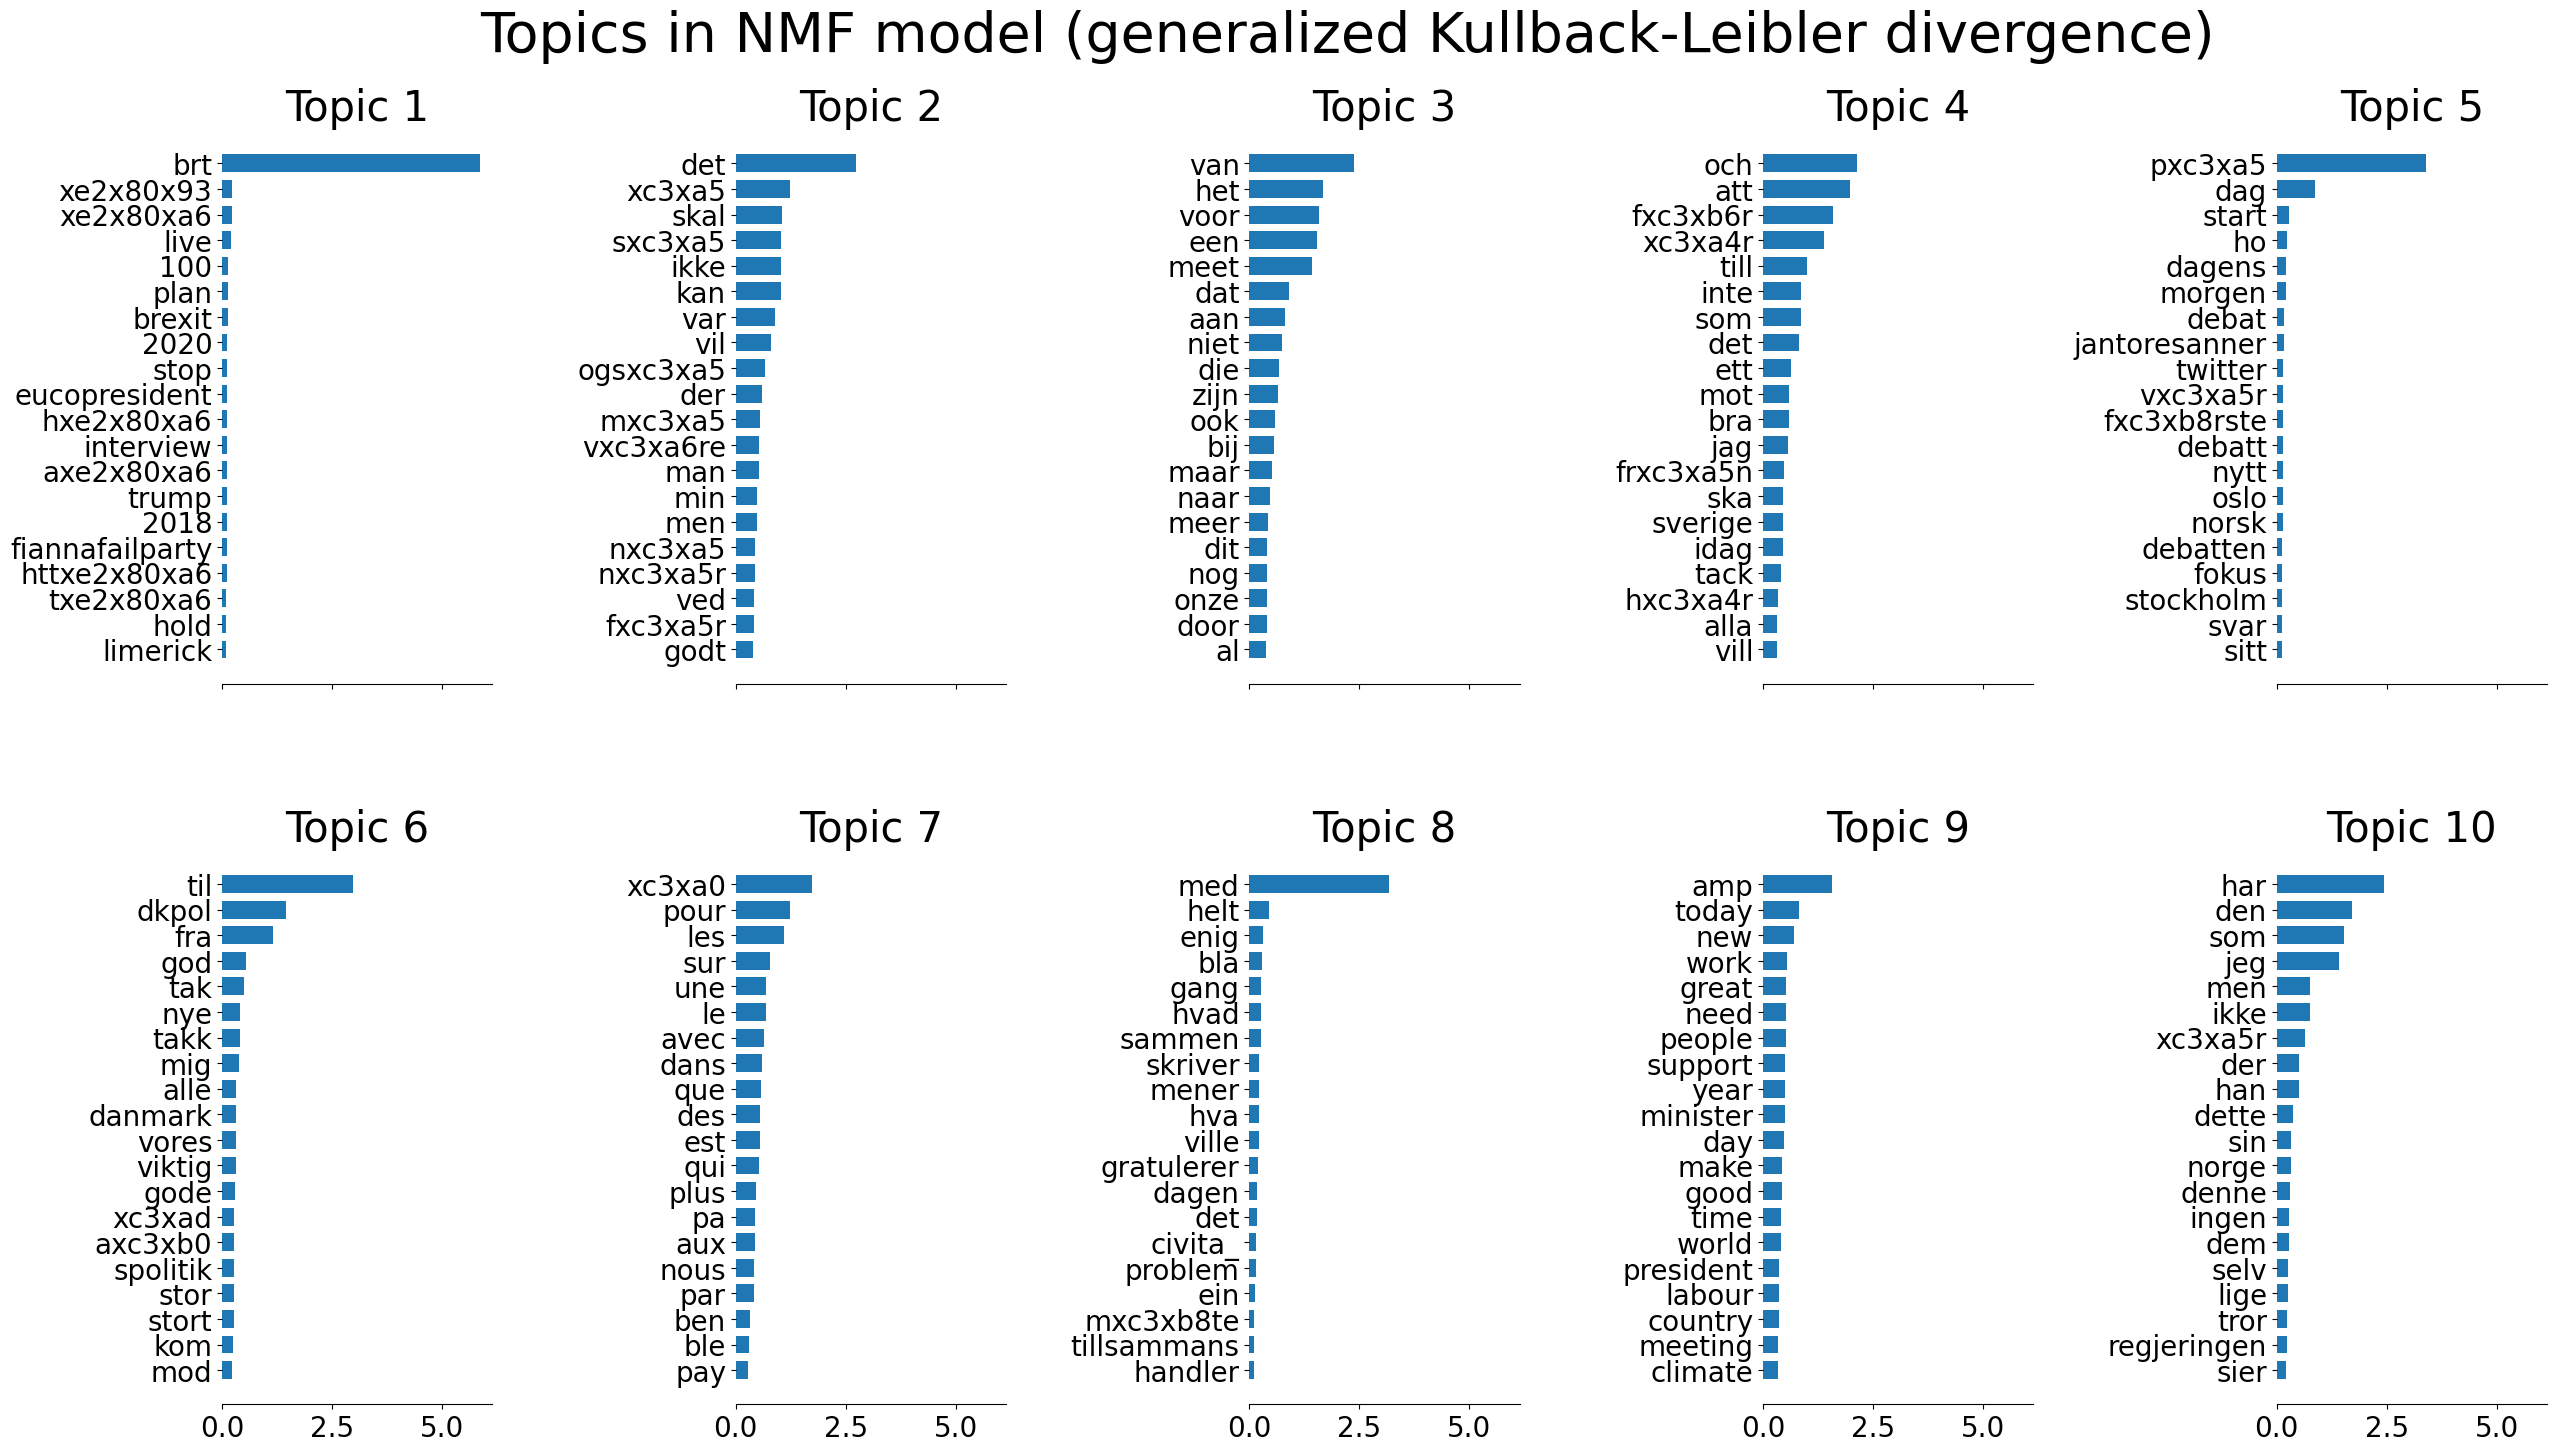

In [ ]:
# Fit the NMF model
print(
    "\n" * 2,
    "Fitting the NMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)


done in 52.173s.


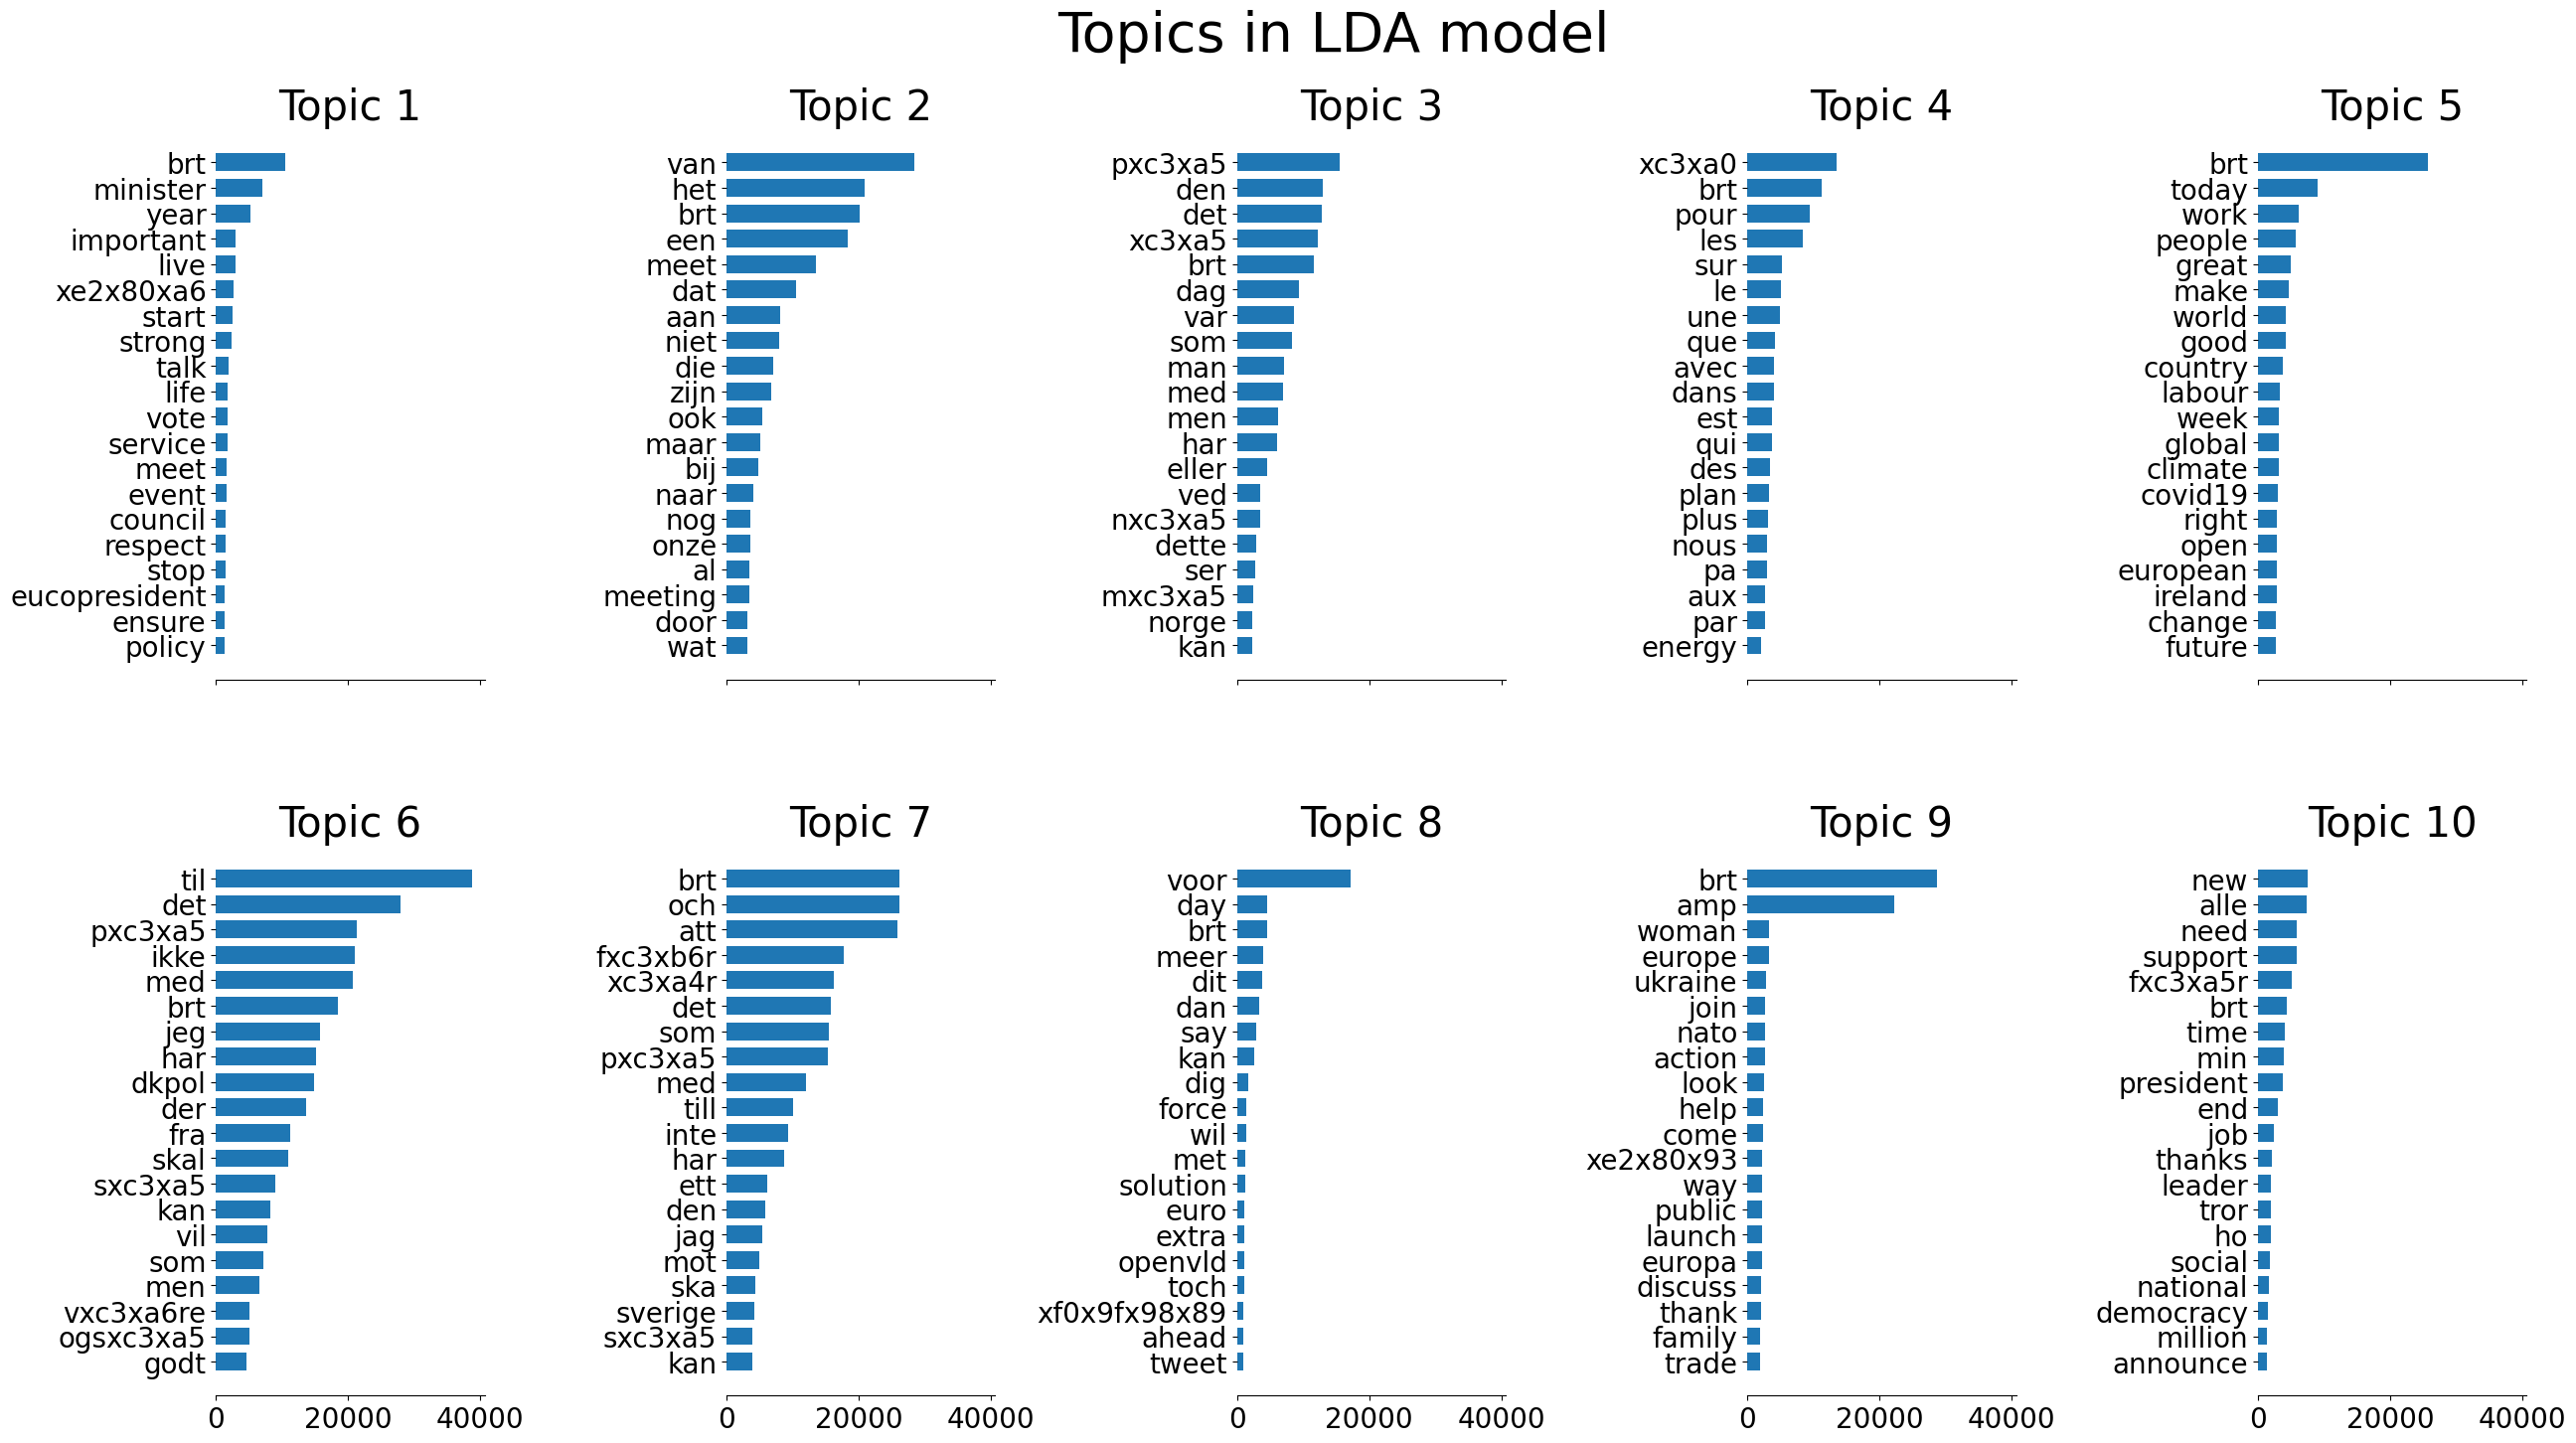

In [ ]:
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

## Modeling

In [23]:
# X = train_data['text_clean']
# train_data['new_text_clean'] = train_data['text_clean'] + train_data['country_user'] + train_data['gender_user'] + str(train_data['hashtags'])
train_data['new_text_clean'] = train_data['text_clean'] + " " + train_data['country_user'] + " " + train_data['gender_user']

X = train_data['new_text_clean']
y = train_data['pol_spec_user']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [25]:

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
accuracy_score(y_test,y_pred)

0.6698180389460502

In [26]:
from sklearn.linear_model import LogisticRegression

lr = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression(max_iter=2000)),
              ])

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.7433145888073079

In [27]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SGDClassifier()),
              ])

sgd.fit(X_train,y_train)

y_pred = sgd.predict(X_test)
accuracy_score(y_test,y_pred)

0.6428062765513346

In [28]:
from sklearn.svm import LinearSVC

svc = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
               ('tfidf', TfidfTransformer()),
               ('clf', LinearSVC()),
              ])

svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)
accuracy_score(y_test,y_pred)

/Users/htalele/miniconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


0.7751393561378092

In [29]:
svc.fit(X,y)

/Users/htalele/miniconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()), ('clf', LinearSVC())])

In [30]:
test_data['text_clean'] = test_data['full_text'].apply(lemmatizer.lemmatize_tweet)

In [31]:
# test_data['new_text_clean'] = test_data['text_clean'] + test_data['country_user'] + test_data['gender_user'] + str(test_data['hashtags'])
test_data['new_text_clean'] = test_data['text_clean'] + " " + test_data['country_user'] + " " + test_data['gender_user']


In [32]:
test_pred = svc.predict(test_data['new_text_clean'])

In [33]:
test_pred = pd.DataFrame(test_pred, columns=['pol_spec_user'])
test_pred["Id"] = test_pred.index

test_pred.to_csv("test_predictions.csv", index=False)

In [34]:
print("Time taken", time() - start_time)

Time taken 696.1198260784149
